<a href="https://colab.research.google.com/github/harnalashok/databases/blob/main/6_Database_Normalization_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Last amended: 24th June, 2024
#

# Database normalization--I

## Why Normalization

A basic objective of the first normal (1NF) form defined by Codd in 1970 was to permit data to be queried and manipulated using a "universal data sub-language" grounded in first-order logic. (SQL is an example of such a data sub-language).

The objectives of normalisation beyond *1NF* (first normal form) were stated as follows by Codd:

> 1. To free the collection of relations from undesirable insertion, update and deletion dependencies.<br>
> 2. To reduce the need for restructuring the collection of relations, as new types of data are introduced, and thus increase the life span of application programs.<br>
> 3. To make the relational model more informative to users.<br>
> 4. To make the collection of relations neutral to the query statistics, where these statistics are liable to change as time goes by.<br>
— E.F. Codd, "Further Normalisation of the Data Base Relational Model"<br>

### Update anomaly

If the same information appears  on multiple rows; then updates to the relation may result in logical inconsistencies.<br>     

In the following *Employees' Skills* table, *EmployeeID* and *Skill* form a composite primary key. An employee may have multiple skills.<br>      

Now, a change of address for a particular employee (say, 519) may need to be applied to multiple records (one for each of his skills). If the update is only **partially** successful – the employee's address is updated on some records/rows (say row 3) but not others (ie row 4) – then the relation is left in an *inconsistent* state. <u>Specifically, the relation provides conflicting answers to the question of what this particular employee's address is.</u> This phenomenon is known as an update anomaly.

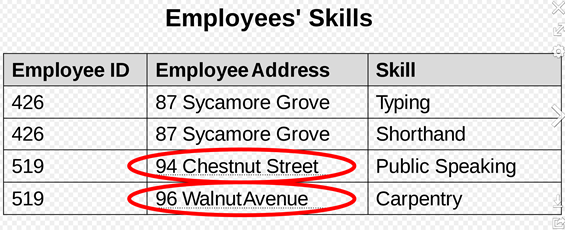

### Insertion anomaly

Following example from [StackOverflow](https://stackoverflow.com/q/12998521/3282777)      
Insertion anomaly. There are circumstances in which certain facts cannot be recorded at all. This table contains both student and course data. Primary key here is *StudentNum* and *CourseNum* (composite key). A student joins the college but has not been allocated a course. His information can not be inserted here.

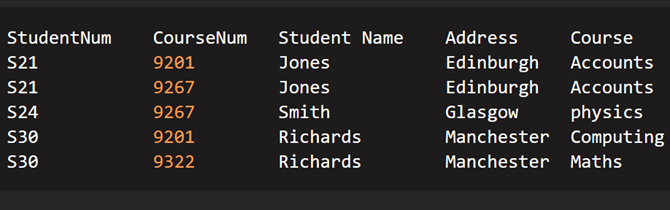

### Deletion anomaly

**Deletion anomalies**:  Under certain circumstances, deletion of data representing certain facts necessitates deletion of data representing completely different facts. For example, if we delete a row from the table `Tbl_Staff_Branch` that represents the last member of staff located at that branch, (for e.g. row with Branch numbers, B3 or B4) the detals about that branch are also lost from the Database.     

Note that in this table the primary key is *StaffID*; it is not a composite key. But *Br_Address* depends completely upon *BrachID* and the address does not depend upon *StaffID*.

Example is from [StackOverflow](https://stackoverflow.com/a/31643707/3282777)

Table of *Staff_and_Branch*

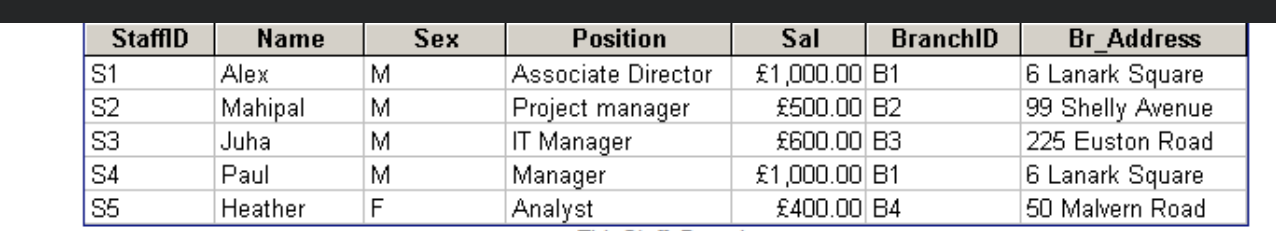

### More examples

Let us create a table to see what all problems are possible if not designed carefully.

In [ ]:
pd.DataFrame(
              [

                ('Ramesh Jain', '15 Jai Road, Jaipur', 'BA, MA', 'yes',2003, 'dataScience, management, HR','A,B,B', 'BDA', 'badminton', 24 ),
                ('Suresh Bhardwaj', '63 Akbar Road, Jaipur', 'BA', 'no',2008, 'dataScience, HR, maths','B,C,B', 'Finance', 'badminton', 24 ),
                ('Ashok Sharma', '72 Videsh, Jabalpur', 'BSc', 'yes',2008, 'economics, management, maths','A,A,B', 'Finance', 'football',23),
                ('Aafiya Kumari', '23, Fauji More, Jorhat', 'BSc, MSc(Physics)', 'yes',2005, 'dataScience, management, maths','A,A,A', 'Finance', 'cricket',21),
                ('Abhi Sharma', '35, 5th floor, Amarpali, NOIDA', 'BA, MA, CA', 'yes',2005, 'finance,dataScience, management','B,B,B', 'Management', 'cricket',26 ),
                ('Vikas Mehra', '15 Singh Road, Delhi', 'Engineering', 'no',2003, 'maths, finance, economics','A,B,C', 'Management', 'football',24 ),
                ('Vidur Jain', '34, village: jakod, Kanpur', 'Engineering(CSE)', 'yes',2009, 'dataScience, economics, maths','A,B,B', 'BDA', 'watchingTV',21 ),
                ('Ram Verma', '530, Sector 15A, Gurugram', 'BA, MA, MPhil', 'no',2013, 'economics, management, finance','A,C,C', 'Finance', 'chess',22 )

              ],
              columns = ['fullName', 'address', 'education', 'backward', 'yearGraduation', 'electivesTaken', 'gradesInElectives', 'specialization','eca', 'age']
          )

,fullName,address,education,backward,yearGraduation,electivesTaken,gradesInElectives,specialization,eca,age
0,Ramesh Jain,"15 Jai Road, Jaipur","BA, MA",yes,2003,"dataScience, management, HR","A,B,B",BDA,badminton,24
1,Suresh Bhardwaj,"63 Akbar Road, Jaipur",BA,no,2008,"dataScience, HR, maths","B,C,B",Finance,badminton,24
2,Ashok Sharma,"72 Videsh, Jabalpur",BSc,yes,2008,"economics, management, maths","A,A,B",Finance,football,23
3,Aafiya Kumari,"23, Fauji More, Jorhat","BSc, MSc(Physics)",yes,2005,"dataScience, management, maths","A,A,A",Finance,cricket,21
4,Abhi Sharma,"35, 5th floor, Amarpali, NOIDA","BA, MA, CA",yes,2005,"finance,dataScience, management","B,B,B",Management,cricket,26
5,Vikas Mehra,"15 Singh Road, Delhi",Engineering,no,2003,"maths, finance, economics","A,B,C",Management,football,24
6,Vidur Jain,"34, village: jakod, Kanpur",Engineering(CSE),yes,2009,"dataScience, economics, maths","A,B,B",BDA,watchingTV,21
7,Ram Verma,"530, Sector 15A, Gurugram","BA, MA, MPhil",no,2013,"economics, management, finance","A,C,C",Finance,chess,22


What is wrong with the above table? Can I get answer to these questions?  
a. How many are from North East?  
b. How many are staying in Delhi?  
c. How many are CA?  
d. How many have Economics as specialization?
e. How many have 'A' and 'B' grades in economics?  
f. How many have football as hobby?  
g. Do those who play chess get better marks?  
h. What is the average age of a student?  



A revised table that corrects some problems.

In [ ]:
pd.DataFrame(
              [
                ('Ramesh', '15 Jai Road, Jaipur', 'BA, MA', 'yes',2003, 'dataScience','A', 'BDA', 'badminton',24 ),
                ('Ramesh', '15 Jai Road, Jaipur', 'BA, MA', 'yes',2003, 'management','B', 'BDA', 'badminton' ,24),
                ('Ramesh', '15 Jai Road, Jaipur', 'BA, MA', 'yes',2003, 'HR','B', 'BDA', 'badminton',24 ),
                ('Suresh', '63 Akbar Road, Jaipur', 'BA', 'no',2008, 'dataScience','B', 'Finance', 'badminton',24 ),
                ('Suresh', '63 Akbar Road, Jaipur', 'BA', 'no',2008, 'HR','C', 'Finance', 'badminton',24 ),
                ('Suresh', '63 Akbar Road, Jaipur', 'BA', 'no',2008, 'maths','B', 'Finance', 'badminton',24 )
              ],
               columns = ['fullName', 'address', 'education', 'backward', 'yearGraduation', 'electivesTaken', 'gradesInElectives', 'specialization','eca', 'age']
           )

,fullName,address,education,backward,yearGraduation,electivesTaken,gradesInElectives,specialization,eca,age
0,Ramesh,"15 Jai Road, Jaipur","BA, MA",yes,2003,dataScience,A,BDA,badminton,24
1,Ramesh,"15 Jai Road, Jaipur","BA, MA",yes,2003,management,B,BDA,badminton,24
2,Ramesh,"15 Jai Road, Jaipur","BA, MA",yes,2003,HR,B,BDA,badminton,24
3,Suresh,"63 Akbar Road, Jaipur",BA,no,2008,dataScience,B,Finance,badminton,24
4,Suresh,"63 Akbar Road, Jaipur",BA,no,2008,HR,C,Finance,badminton,24
5,Suresh,"63 Akbar Road, Jaipur",BA,no,2008,maths,B,Finance,badminton,24


But then, there are still more problems.

What is wrong with above data?<br>
>a. Too much repetition of text. May cause spelling mistakes in entry. 'Ramesh' occurs in three rows and so also many values get repeated.<br>
>b. High memory consumption<br>
>c. What if dataScience is to be re-written as: dataMining<br>

In [ ]:
#################